In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [40]:
import sys
import pandas as pd
import numpy as np
import matplotlib 
import sklearn

In [41]:
print("Python: {}".format(sys.version))
print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("matplotlib: {}".format(matplotlib.__version__))

Python: 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
Pandas: 1.0.3
Numpy: 1.18.5
matplotlib: 3.2.1


In [42]:
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix

In [43]:
#loading the dataset

In [44]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names= ['id','clump_thickness','uniform_cell_size','uniform_cell_shape','marginal_adhesion','signle_epithelial_size',
'bare_nuclei','bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url,names=names)

In [45]:
df.replace('?',-9999,inplace=True)
print(df.axes)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


In [46]:
df.shape

(699, 11)

In [47]:
df.drop(['id'],axis=1,inplace=True)

In [48]:
df.shape

(699, 10)

In [49]:
df.axes

[RangeIndex(start=0, stop=699, step=1),
 Index(['clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
        'marginal_adhesion', 'signle_epithelial_size', 'bare_nuclei',
        'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
       dtype='object')]

In [50]:
df.loc[0]

clump_thickness           5
uniform_cell_size         1
uniform_cell_shape        1
marginal_adhesion         1
signle_epithelial_size    2
bare_nuclei               1
bland_chromatin           3
normal_nucleoli           1
mitoses                   1
class                     2
Name: 0, dtype: object

In [51]:
df.describe()

,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,signle_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


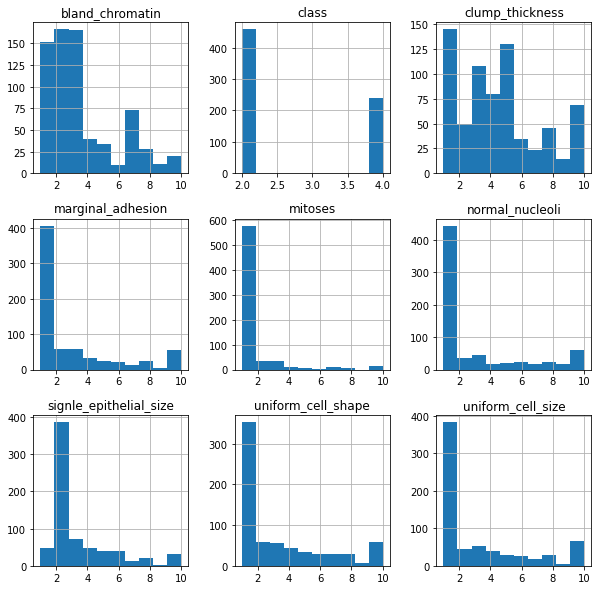

In [52]:
df.hist(figsize=(10,10))
plt.show()

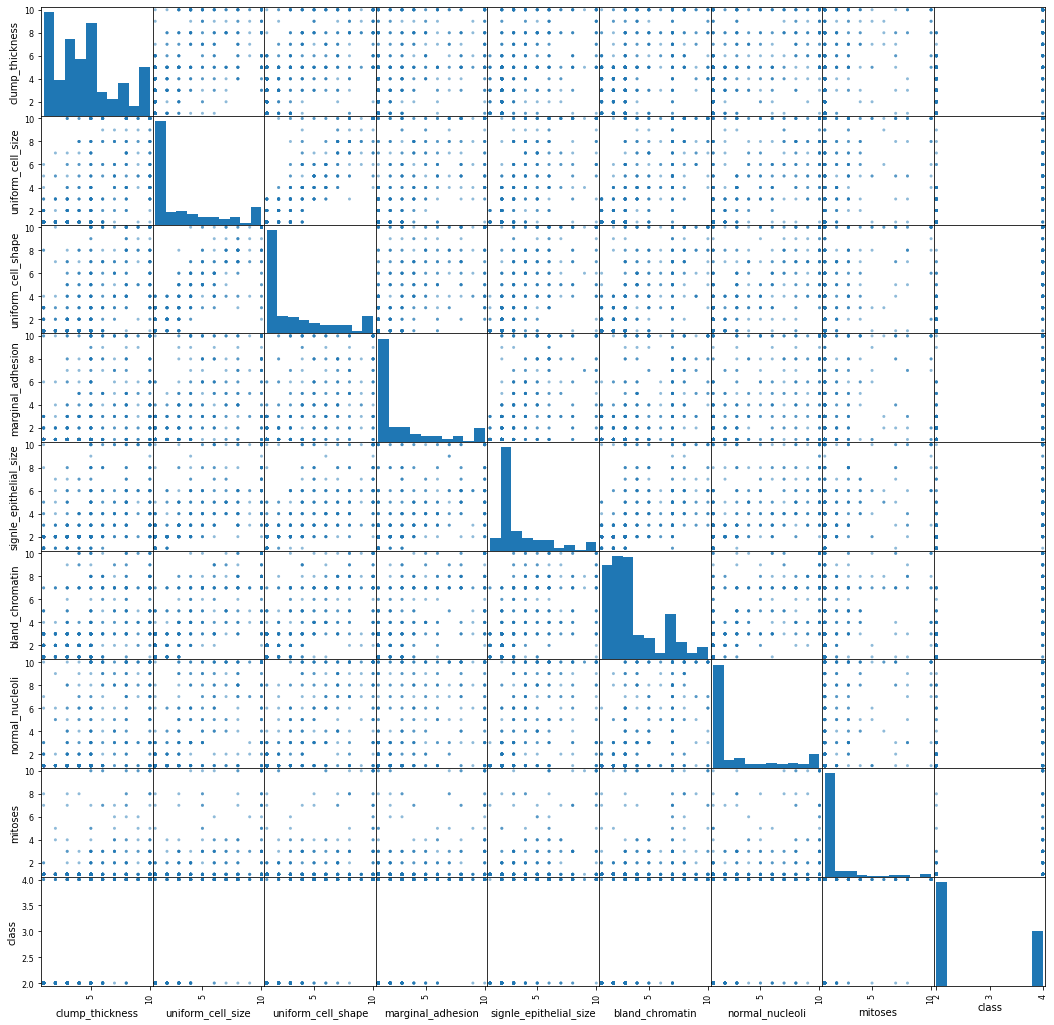

In [53]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [54]:
X = np.array(df.drop(['class'],axis=1))
y = np.array(df['class'])

In [55]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.2)

In [56]:
#specifying testing options
seed = 8
scoring = 'accuracy'

In [57]:
#Define model to train
models = []
models.append(('KNN_KNeighbors',KNeighborsClassifier(n_neighbors=5)))
models.append(('SVM',SVC()))


In [58]:
#Evaluate each model
results = []
names = []


for name,model in models:
    Kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model,X_train,y_train,cv=Kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s : %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)

KNN_KNeighbors : 0.964221 (0.023959)
SVM : 0.647597 (0.042153)


In [62]:
#make predictions
for name,model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))
    
    
    

KNN_KNeighbors
0.9785714285714285
              precision    recall  f1-score   support

           2       0.99      0.98      0.98        96
           4       0.96      0.98      0.97        44

    accuracy                           0.98       140
   macro avg       0.97      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140

SVM
0.6857142857142857
              precision    recall  f1-score   support

           2       0.69      1.00      0.81        96
           4       0.00      0.00      0.00        44

    accuracy                           0.69       140
   macro avg       0.34      0.50      0.41       140
weighted avg       0.47      0.69      0.56       140



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
#testing with data point
clf = SVC()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)
example = np.array([[4,2,1,1,1,2,3,2,1]])
example = example.reshape(len(example),-1)
preediction = clf.predict(example)
print(preediction)

0.6857142857142857
[2]
